In [ ]:
# Non Linearity, Tree Based classification, SVM
# 1) Use non-linearity for regression task (30%)
    # a) polynomials
    # b) step functions
    # c) splines
    # d) local regression
    # e) generalized additive models
# 2) Tree-based methods for classification or regression task (30%)
    # a) bagging
    # b) random forests
    # c) boosting
# 3) Apply SVM for classification or regression tasks with different kernels. (20%)

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, s, f
import matplotlib.pyplot as plt


In [3]:
df_reg = pd.read_csv('/Users/eljan/Documents/ML-Course-ADA/project-1/binaaz_cleaned.csv')
df_reg.head()

,price,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,distance_city_center,rayon_Abşeron,rayon_Binəqədi,...,metro_Nəsimi,metro_Qara Qarayev,metro_Sahil,metro_Ulduz,metro_Xalqlar Dostluğu,metro_İnşaatçılar,metro_İçəri Şəhər,metro_Şah İsmayıl Xətai,metro_Əhmədli,seher_baki
0,300000,0,0.294118,135.0,3,1,0,1.645502,0,0,...,0,0,0,0,0,0,0,0,0,1
1,89900,0,0.666667,65.0,2,1,0,4.888944,0,0,...,0,0,0,0,0,0,0,0,0,1
2,142000,0,0.647059,115.0,3,1,0,8.291625,0,0,...,0,0,0,0,0,0,0,0,0,1
3,235000,0,1.000000,192.0,4,1,0,6.159160,0,0,...,0,0,0,0,0,0,0,0,0,1
4,235000,0,0.750000,107.0,2,0,0,5.461605,0,0,...,0,0,0,0,0,0,0,0,0,1


## 1) Use non-linearity for regression task (30%)

In [5]:
X = df_reg.drop('price', axis=1)
y = df_reg['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Using 2nd degree polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("RMSE for Polynomial Regression:", rmse_poly)

RMSE for Polynomial Regression: 1155677668.6630573


In [12]:
# Example with 3 bins and only one feature
X_train_step = X_train.copy()
X_test_step = X_test.copy()
X_train_step['binned'] = pd.cut(X_train['Sahə'], bins=3, labels=False)
X_test_step['binned'] = pd.cut(X_test['Sahə'], bins=3, labels=False)

step_model = LinearRegression()
step_model.fit(X_train_step, y_train)
y_pred_step = step_model.predict(X_test_step)
rmse_step = np.sqrt(mean_squared_error(y_test, y_pred_step))
print("RMSE for Step Functions:", rmse_step)

RMSE for Step Functions: 36985.9314945987


In [8]:
gam = LinearGAM(s(0)).fit(X_train, y_train)
y_pred_gam = gam.predict(X_test)
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
print("RMSE for Splines using GAM:", rmse_gam)


RMSE for Splines using GAM: 73187.71283666055


In [9]:
# Local regression-like behavior can be approximated by setting a very high spline order

local_gam = LinearGAM(s(0, n_splines=50)).fit(X_train, y_train)
y_pred_local = local_gam.predict(X_test)
rmse_local = np.sqrt(mean_squared_error(y_test, y_pred_local))
print("RMSE for Local Regression using GAM:", rmse_local)


RMSE for Local Regression using GAM: 73187.71283665973


In [10]:
full_gam = LinearGAM(s(0) + s(1) + f(2)).fit(X_train, y_train)
y_pred_full_gam = full_gam.predict(X_test)
rmse_full_gam = np.sqrt(mean_squared_error(y_test, y_pred_full_gam))
print("RMSE for Generalized Additive Model:", rmse_full_gam)


RMSE for Generalized Additive Model: 44044.85423520506


## 2) Tree-based methods for classification or regression task (30%)

In [17]:
df_class = pd.read_csv("/Users/eljan/Documents/ML-Course-ADA/project-2/credit_score.csv")
df_class.drop(columns=["Unnamed: 0"], inplace=True)
df_class = df_class[df_class['Credit_Score'] != 1]
df_class['Credit_Score'] = df_class['Credit_Score'].map({2: 0, 0: 1})
df_class.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,0
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,0
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,0
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,0
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,0


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [19]:
X = df_class.drop('Credit_Score', axis=1)
y = df_class['Credit_Score']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features (important for some models and metrics like distance-based ones)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Bagging
bagging_model = BaggingClassifier(n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

Bagging:
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4309
           1       0.97      0.93      0.95      6892

    accuracy                           0.93     11201
   macro avg       0.93      0.94      0.93     11201
weighted avg       0.94      0.93      0.93     11201



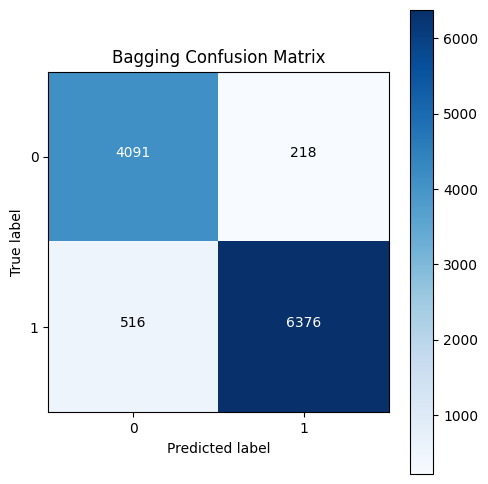

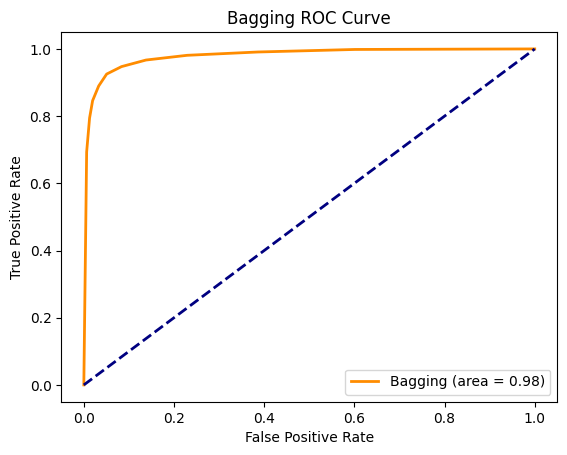


Random Forest:
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4309
           1       0.97      0.93      0.95      6892

    accuracy                           0.94     11201
   macro avg       0.93      0.94      0.94     11201
weighted avg       0.94      0.94      0.94     11201



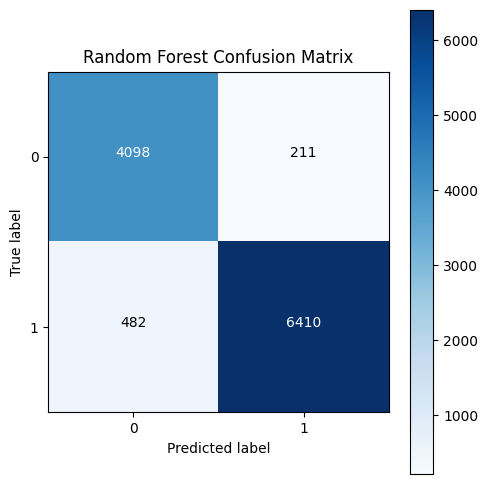

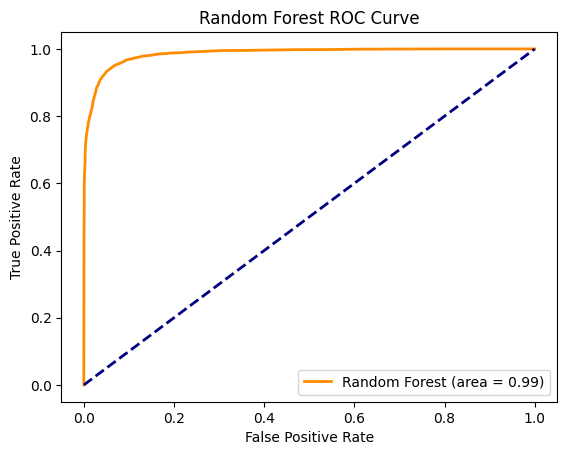


Boosting:
Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4309
           1       0.94      0.87      0.90      6892

    accuracy                           0.89     11201
   macro avg       0.88      0.89      0.88     11201
weighted avg       0.89      0.89      0.89     11201



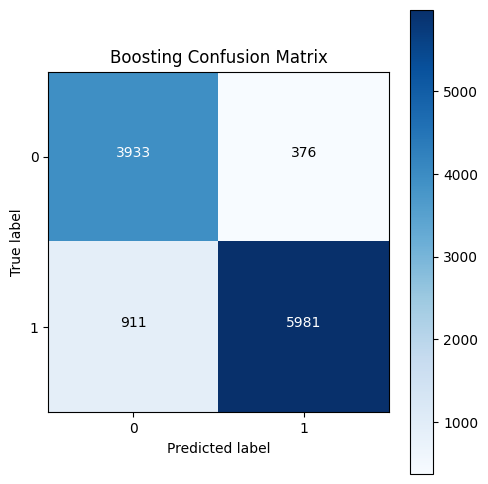

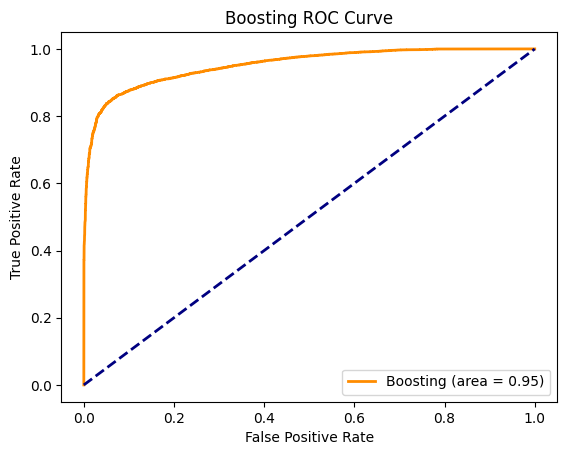

In [27]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n{cr}")
    
    # Confusion Matrix Plot
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})', color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


# Evaluating each model
print("Bagging:")
evaluate_model(bagging_model, X_test_scaled, y_test, "Bagging")
print("\nRandom Forest:")
evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
print("\nBoosting:")
evaluate_model(boosting_model, X_test_scaled, y_test, "Boosting")


In [25]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled, y_train)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, probability=True)
svm_poly.fit(X_train_scaled, y_train)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)


SVC(probability=True)

SVM Linear Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      4309
           1       0.92      0.82      0.87      6892

    accuracy                           0.84     11201
   macro avg       0.84      0.85      0.84     11201
weighted avg       0.86      0.84      0.85     11201



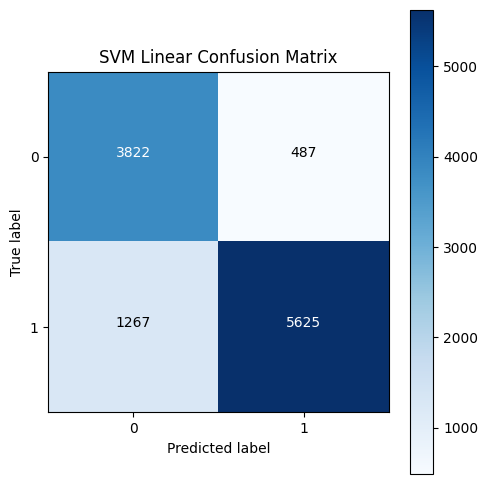

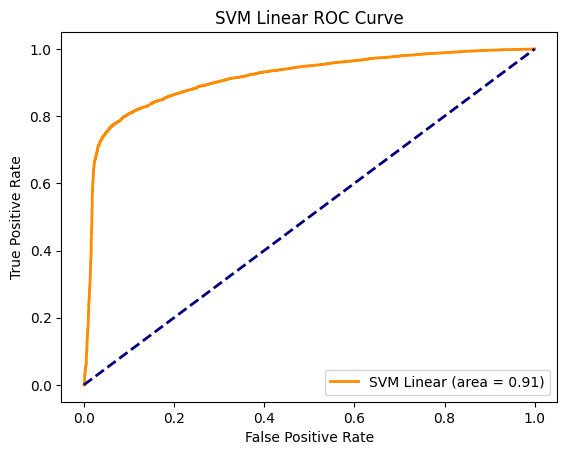

SVM Polynomial Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      4309
           1       0.92      0.84      0.88      6892

    accuracy                           0.86     11201
   macro avg       0.85      0.86      0.85     11201
weighted avg       0.86      0.86      0.86     11201



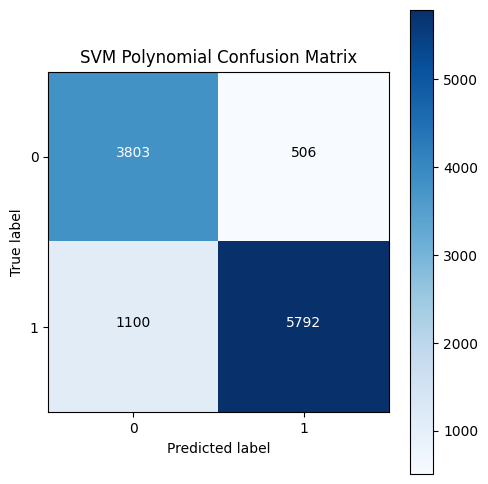

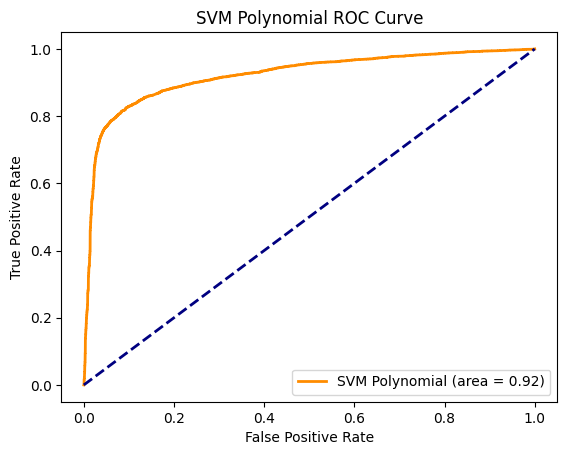

SVM RBF Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      4309
           1       0.94      0.83      0.88      6892

    accuracy                           0.86     11201
   macro avg       0.86      0.87      0.86     11201
weighted avg       0.87      0.86      0.86     11201



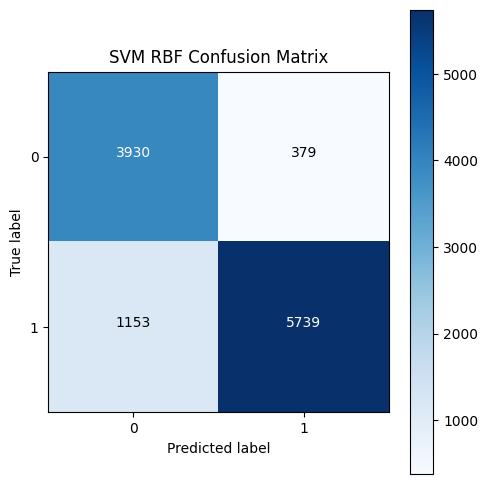

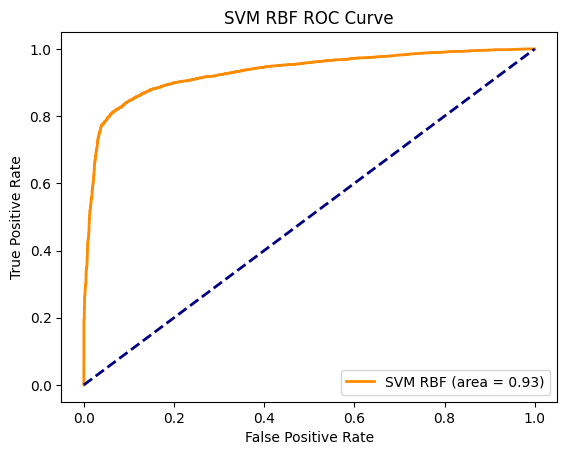

In [28]:
evaluate_model(svm_linear, X_test_scaled, y_test, 'SVM Linear')
evaluate_model(svm_poly, X_test_scaled, y_test, 'SVM Polynomial')
evaluate_model(svm_rbf, X_test_scaled, y_test, 'SVM RBF')